In [1]:
try:
    reload(experiment)
except:
    import experiment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

exp = experiment.Experiment().load_data()

---> from .\saved_17-Apr-2018_17-10-01.pkl:
	p01
	p02
	p03
	p04
	p05
	p06
	p07
	p08
	p09
	p10
	p11
	p12
	p13
	p14
	p15
	p16
	p17
	p18
	p19
	p20
	p21
	p22
	p23
	p24
	p25
	p26
	p27
	p28
	p29
	p30
	p31
	p32
	p33
	p34
	p35
	p36
	p37
	p38
	p39
	p40
	p41
	p42
	p43
	p44
	p45


# 1. Fixations - target distance analysis

### Fixations histogram

In [2]:
fixations_number = []

for participant in exp:
    if participant.exclude:
        continue
    for trial in participant:
        if trial.exclude:
            continue
        fixations_number.append(len(trial.fixations))
        
print 'Working with {} fixations'.format(len(fixations_number))

Working with 2877 fixations


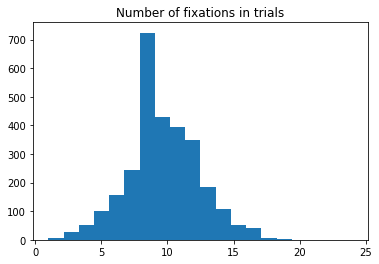

In [3]:
h = plt.hist(fixations_number, bins = 20)
t = plt.title('Number of fixations in trials')

### First fixations' distribution

In [63]:
left = [[], [], [], []]
right = [[], [], [], []]

for participant in exp:
    if participant.exclude: continue
    for i, part in participant.iter_parts():
        for trial in part:
            if trial.exclude:continue
            
            fs = trial.find_fixations(timerange = [100, 300])
            if fs:
                
                cols = np.array(zip(*fs))
                weighted = np.sum(cols[3] * cols[2]) / np.sum(cols[2])
                
                if participant.condition == 'Left':
#                     left[i].extend(zip(*fs)[3])
#                     left[i].append(fs[-1][3])
                    left[i].append(weighted)
                elif participant.condition == 'Right':
#                     right[i].extend(zip(*fs)[3])
#                     right[i].append(fs[-1][3])
                    right[i].append(weighted)

data = [left, right]

In [64]:
fig, axs = plt.subplots(nrows = 2, ncols = 4, sharex = True, sharey = True)

for i, row in enumerate(axs):
    for k, col in enumerate(row):
        col.hist(data[i][k], bins = 50)
        col.set_xlim([0.5, 0.7])
        col.set_title('part {}, n = {}'.format(k, len(data[i][k])))
        avg = np.mean(data[i][k])
        med = np.median(data[i][k])
        std = np.std([left, right][i][k])
#         col.axvline(avg, color = 'r', linewidth = 1)
#         col.axvline(0.607, linestyle = ':', color = 'k', linewidth = 1)
        col.axvspan(0.607-0.02, 0.607+0.02, color = 'k', alpha = 0.1)
        col.axvline(avg, color = 'r', linewidth = 1)
        col.axvline(avg+2*std, color = 'r', linestyle = ':', linewidth = 1)
        col.axvline(avg-2*std, color = 'r', linestyle = ':', linewidth = 1)

In [ ]:
colnames = ['participant', 'condition', 'part', 'f-t distance']
fix100 = pd.DataFrame(columns = colnames)
fix300 = pd.DataFrame(columns = colnames)

for name, participant in exp:
    if participant.exclude:
        continue
    for part_n, part in participant.iter_parts():
        for trial in part:
            
            if trial.exclude:
                continue

            f = trial.find_fixations(time = 300)

            if not f:
                f = np.nan
            else:
                f = f[3]

            line = [participant.name, participant.condition, part_n, f - trial.ObjectX[300]]
            to_add = dict(zip(colnames, line))

            fix300 = fix300.append(pd.Series(to_add), ignore_index = True)

In [ ]:
fix300.groupby(['participant', 'condition', 'part']).aggregate(np.mean)

In [ ]:
by_condition = fix300.groupby(['condition', 'part']) \
                     .aggregate(np.mean) \
                     .reset_index(level = 'condition')

In [ ]:
by_condition.condition

In [ ]:
l = by_condition[by_condition.condition == 'Left']
r = by_condition[by_condition.condition == 'Right']

In [ ]:
l.plot(kind = 'bar')
r.plot(kind = 'bar')